<h1 style="color:Blue;" align="center"> Minería de texto  </h1>

<h2 style="color:gray;" >  Objetivo </h2>

El presente notebook busca ofrecer diferentes alternativas para el análisis de texto visto desde un enfoque no supervisado, como objetivo se tiene ofrecer una alternativa estadística y analítica que permita a las empresas estudiar su reputación, su acertividad en el marketing y el impacto de su publicidad, eso atraves de la escucha de sus consumidores. Los datos recolectados para este ejercicio corresponden a la extracción de tweets, sin embargo, dada la construcción del notebook, el código realizado es válido para cualquier fuente de información, ya sea mineria de rede sociales o encuestas. Dado el flujo de trabajo natural en la investigación de mercados el código se ha construido de tal manera que la cantidad de código quemado sea mínima, permitiendo así que la ejecución, análisis y entrega de los resultados se realice en un tiempo mínimo.

Por otro lado, conociendo la facilidad de disponer randes volumenes de datos para esta tarea se implementan algunas funciones de la librería **_DASK_**; **_delayed_, _dask.bag_** y **_dask.dataframe_** son algunos ejemplos. Cabe notar que las partes de código paralelizadas que se conservan son las que presentaron optimizaciones aún en el caso de que los datos se ajusten sin problema a la memoria del dispositivo.

Antes de comenzar se presentan algunos detalles técnicos necesarios.

<h2 style = 'color:gray' > Conceptos Básicos </h2>

### Palabras o Términos

La palabra es la unidad mínima de información en el trabajo con lenguaje natural.

Desde una perspectiva muy moderna las palabras son objetos que puede pensarse como puntos que están en un espacio de alta dimensión, de tal manera que, puntos cercanos en algún sentido de distancia corresponde a palabras que tienen una cercanía dentro de un universo de palabras considerado.

La siguiente imagen corresponde a uno conjunto de palabras de astrofísica, consideradas en un estudio de resumenes de artículos científicos. Este es un gráfico obtenido luego de un procesamiento como lo que mostramos hoy, desarrollado por Montenegro y Montenegro usando una técnica de análisis basada en la teoría de respuesta al ítem multidimensional (TRIM).

en este documetnos las palabras de denotarán como  $w_i, i = 1,2,\cdots,K$

### Documentos 

Los documentos son los sujetos en los análisis textual superficial. Suponemos que se tiene un conjunto de documentos individuales, cada uno de los cuales se denotará por $w$. Se considera que un documento es una sucesión de $N$ palabras. Así se tiene que un documento se denota como $w=\{w_1,…,w_N\}$.

### Corpus

Un corpus es una colección de documentos en un problema particular.

### Tópicos

Los tópicos son áreas latentes a las cuales están asociados tanto las palabras como los documentos. Uno de los propósitos principales del análisis de textos es descubrir o poner en evidencia tales tópicos.

La figura anterior muestra por ejemplo la presencia de 10 tópicos en el conjunto de documentos de astrofísica analizados.


<h3 style = 'color:#00CED1' > Preprocesamiento de datos textuales </h3>

En lo que sigue, vamos a utilizar los términos token y tokenizar, que aún no son adoptados por la Real Academia de la Lengua, pero que creemos pronto lo serán como tantos otros provenientes del inglés debido a su enorme utilización actual, por razón de los desarrollos científicos y tecnológicos.

Realizaremos los siguientes pasos:

* **Tokenización:** divide el texto en oraciones y las oraciones en palabras. Ponga las palabras en minúsculas y elimine la puntuación.
* Se **eliminan las palabras que tienen menos de 3 caracteres.**
* Se eliminan todas las **palabras vacías.**
* Las palabras se **lematizan:** las palabras en tercera persona se cambian a primera persona y los verbos en tiempo pasado y futuro se cambian a presente.
* Las palabras se recortan (**stemming**): las palabras se reducen a su forma raíz.

Usaremos las librerías *gensim* y *nltk* para hacer este trabajo.

### Tokenización

Algunos términos que se utilizarán con frecuencia son:

* Corpus: cuerpo del texto, singular. Corpora es el plural de corpus.
* Léxico: palabras y sus significados.
* Token: cada entidad que es parte de lo que sea que se dividió según las reglas que establecemos apara el análisis. Por ejemplo, cada palabra es un token cuando una oración se tokeniza en palabras. Cada oración también puede ser un token, si ha convertido las oraciones en un párrafo.

Básicamente, tokenizar implica dividir oraciones y palabras del cuerpo del texto.

Veá el siguiente ejemplo tomado de   [Geek for Geeks](https://www.geeksforgeeks.org/tokenize-text-using-nltk-python/?ref=rp). Usamos la librería *nltk*.

### Lematización
La lematización es el proceso de agrupar las diferentes formas flexionadas de una palabra para que puedan analizarse como un solo elemento. La lematización es similar a la derivación, pero aporta contexto a las palabras. Por lo tanto, vincula palabras con un significado similar a una palabra.

El preprocesamiento de texto incluye tanto *Stemming* como _Lemmatization_.

Muchas veces las personas encuentran confusos estos dos términos. Algunos tratan a estos dos como iguales.

**En realidad, se prefiere la lematización a la derivación porque la lematización realiza un análisis morfológico de las palabras.**

Las aplicaciones de la lematización son:

* Se utiliza en sistemas de recuperación integrales como motores de búsqueda.
* Utilizado en indexación compacta
* Ejemplos de lematización:

* rocas -> roca

* corpora -> corpus
* mejor -> bueno

Una diferencia importante con la derivación es que lematizar toma una parte del parámetro de voz, "pos". Si no se proporciona, el valor predeterminado es "sustantivo". En el siguiente ejemplo vamos colocar pos='a' que significa adjetivo. Si se coloca pos ='v' significa verbo. Por defecto es pos ='n', es decir sustantivo.

A continuación se muestra la implementación de lematización de algunas palabras en inglés usando la librería *nltk*:

### Steeming
La derivación (steeming) es el proceso de producir variantes morfológicas de una palabra raíz / base. Los programas de derivación se conocen comúnmente como algoritmos de steeming o derivaciones. Un algoritmo de stemming reduce las palabras como en los siguientes ejemplos

* "chocolates", "chocolates", "choco" a la raíz de la palabra, "chocolate"
* "recuperación", "recuperado", "recupera" se reduce a la raíz "recuperar".

Una vez presentado lo anterior se procede con el **análisis de texto**

<h2 style="color:#00CED1;" align="center"> Lectura de bases de datos </h2>

In [1]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import nltk
#import stanza
from nltk.corpus import stopwords
import re, unicodedata

from rpy2.robjects import r
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

import spacy
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from pprint import pprint
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

nltk.download('wordnet')
utils = importr('utils')
#stanza.download('en')
#nlp = stanza.Pipeline('en')
#conda install -c conda-forge fastparquet
#conda install -c conda-forge dask-ml

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\David.solano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import dask.dataframe as dd
import pandas as pd 
import numpy as np
import os 
os.chdir('C:/Users/David.solano/OneDrive - Ipsos/David/Big Data y Ciencia de Datos/Just Do It - NIKE/BASES')

C:\Users\David.solano\Anaconda3\envs\David\lib\site-packages\fsspec\__init__.py:47: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for spec in entry_points.get("fsspec.specs", []):


### Lectura Data Big-Data

In [3]:
df = dd.read_csv('Datos_tweets3/leche_*.csv')
df = df.compute() 

duplicados = df.tweet_full_text.duplicated()
df = df[~duplicados]

df.head()

,tweet_created_at,tweet_id,tweet_full_text,tweet_retweet_count,tweet_favorite_count,user_id,user_name,user_screen_name,user_location,user_description,user_protected,user_followers_count,user_friends_count
0,Mon Jul 26 20:54:00 +0000 2021,1419762952647831557,Quién me saca la leche,0,0,1293707580800249858,Angel,JoseAng15105132,Balcones,Me gusta divertirme pasarla bien tengo 19 años...,False,36,270
1,Mon Jul 26 20:26:58 +0000 2021,1419756149579161602,"Y son LA LECHE. Una macarrada con romanos, dru...",1,3,802123980,"Javier Pérez Alarcón, traductor de profesión",javipalarcon,Valencia,Traductor audiovisual y ajustador (@UJIUnivers...,False,9317,985
2,Mon Jul 26 20:24:23 +0000 2021,1419755500229566464,Los días en los que más subo de peso son cuand...,0,0,938542761925599232,🌴,_Alimnslvo,"Soledad, Colombia",Alicia♡,False,1407,348
3,Mon Jul 26 19:57:29 +0000 2021,1419748731747029003,@votosauroners @universoauroner Vaso con leche...,0,0,989379715,MλRY,marydelah,Barranquilla,A pesar de los truenos de la vida nunca pierda...,False,838,693
4,Mon Jul 26 18:37:57 +0000 2021,1419728714045267969,@dracortezm Sírvelo perrarina mojada con leche...,0,0,108828069,Sandra Medici💙 Parler @sandramedici,smedicig,Falcon-Venezuela,💙Soy Provida,False,358,779


Como este conjunto de datos ajusta en memoria es mejor trabajarlos como pandas/ caso contrario dask DataFrame, la programación incluye los códigos necesarios en caso de que los datos no ajusten en memorria

In [4]:
len(df)

5018

### Lectura datos (Ajuste en Memoria)

In [ ]:
#df = pd.read_excel('file.xlsx',engine ='openpyxl', skiprows = 3 , sheet_name = 'prueba')

#nRow, nCol = df.shape
#print(f'There are {nRow} rows and {nCol} columns')

In [ ]:
#df.head()

### Preprocesamiento

In [5]:
stop_words_add = pd.read_excel('stopword.xlsx',engine='openpyxl')
stop_words_add = list(stop_words_add['V1'])
stop_words = list(stopwords.words("spanish"))
stop_words = stop_words_add + stop_words 
stop_words = list(dict.fromkeys(stop_words))
stop_words.extend(['https','leche','queso','leche '])

In [6]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

#@delayed
def tokenizador(text):
    return(' '.join(tknzr.tokenize(text)))

#@delayed
def sent_to_words(sentence):
    return(gensim.utils.simple_preprocess(str(sentence), deacc=True, min_len = 4))

#@delayed
def remove_stopwords(doc):
    return ' '.join([word for word in simple_preprocess(str(doc)) 
   if word not in stop_words])

#nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
nlp = spacy.load('es_core_news_lg')

#@delayed
def lemmatization(text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    doc = nlp(text)
    return  [token.lemma_ for token in doc if token.pos_ in allowed_postags]

def clean_text(df, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'], variable = 'ABIERTA CON ORTOGRAFÍA'):
    data_lemmatized = df[variable][~df[variable].isna()].map(tokenizador).map(sent_to_words).map(remove_stopwords).map(lemmatization)
    
    filtro = data_lemmatized.map(len) > 0 
    data_lemmatized = data_lemmatized[filtro]
    
    return data_lemmatized

In [7]:
from dask import delayed
from dask import compute
import dask.dataframe as ddf
import dask_ml

In [26]:
#%%time 
#data_lemmatized = df.map_partitions(clean_text,variable = 'tweet_full_text')
#data_lemmatized = data_lemmatized.compute()

Wall time: 2min 20s


In [8]:
%%time
data_lemmatized = clean_text(df, variable = 'tweet_full_text')

Wall time: 1min 10s


<h3 style = 'color:black;' > Algunas visualizaciones </h3>

In [10]:
from itertools import chain
from prettytable import PrettyTable
from collections import Counter

words = list(chain.from_iterable(data_lemmatized))
pt = PrettyTable(field_names=['Palabra', 'Conteo']) 

c = Counter(words)
[ pt.add_row(kv) for kv in c.most_common()[:10] ]
pt.align['Palabra'], pt.align['Conteo'] = 'l', 'r' 
pt._max_width = {'Palabra':60, 'Conteo':10}
print(pt)

+---------+--------+
| Palabra | Conteo |
+---------+--------+
| malo    |    360 |
| querer  |    286 |
| comer   |    236 |
| rico    |    211 |
| decir   |    207 |
| arroz   |    179 |
| yogur   |    162 |
| mejor   |    161 |
| bueno   |    159 |
| hacer   |    148 |
+---------+--------+


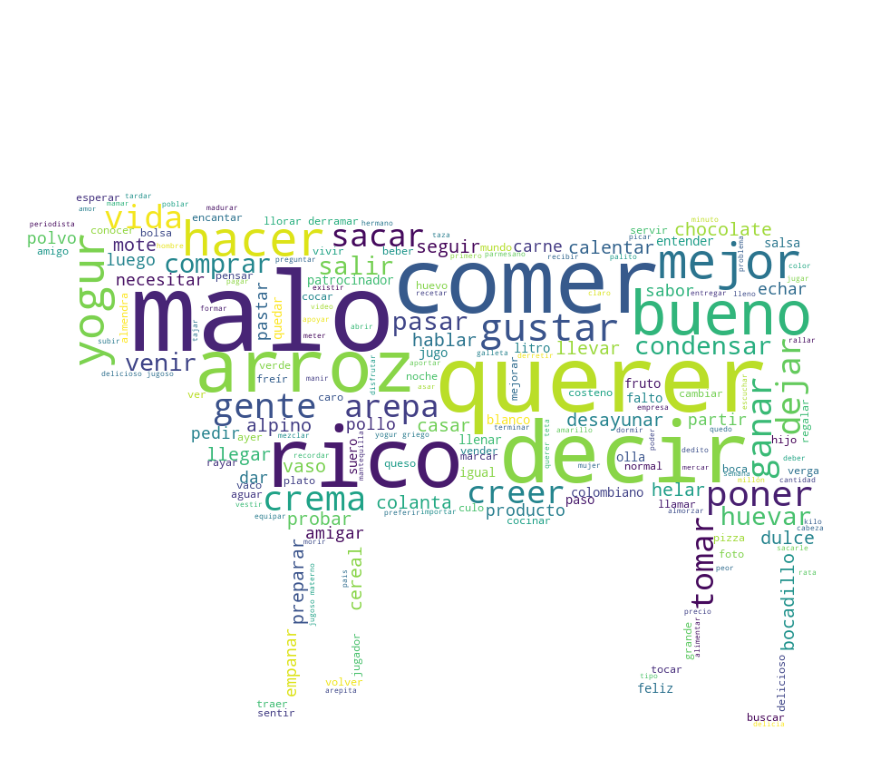

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

wave_mask = np.array(Image.open( "vacanegra.jpg"))
str_words = ' '.join(words) 
wordcloud = WordCloud(width = wave_mask.shape[1], height = wave_mask.shape[0],
                background_color ='white',
                min_font_size = 5,mask=wave_mask).generate(str_words)
                    
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Las anteriores visualizaciones brindan una perspectiva general de lo más mencionado por las personas, dando así puntos de partida para los posibles hallazgos. Sin embargo, es de notar, que pese a que son informativas, no son lo suficientemente contundentes para poder establecer conclusiones, por lo cual, se procede con la construcción de uno de los modelos generaivos más empleados en la actualidad enfocados al hallazgo de temas; el **LDA**. Este algoritmo requiere de unos pasos preliminares, como la construcción de un diccionario, el corpus y la matriz TD-IDF. 

#### TF-IDF 

Tf-idf (del inglés Term frequency – Inverse document frequency), frecuencia de término – frecuencia inversa de documento (o sea, la frecuencia de ocurrencia del término en el corpus de documentos), es una medida numérica que expresa cuán relevante es una palabra para un documento en un corpus. Esta medida se utiliza a menudo como un factor de **ponderación en la recuperación de información y la minería de textos.**

El valor tf-idf aumenta proporcionalmente al número de veces que una palabra aparece en el documento, pero es compensada por la frecuencia de la palabra en el corpus de documentos, lo que permite manejar el hecho de que algunas palabras son generalmente más comunes que otras.

Variaciones del esquema de peso tf-idf son empleadas frecuentemente por los motores de búsqueda como herramienta fundamental para medir la relevancia de un documento dada una consulta del usuario, estableciendo así una ordenación o ranking de los mismos.

Tf-idf puede utilizarse exitosamente para el filtrado de las palabras vacías (stop-words), en diferentes campos del pre-procesamiento de textos.

#### LDA - Ideas Generales 

Las ideas centrales detrás de LDA son las siguientes. El modelo generativo supone que los documentos son generados como sigue:

1. El tamaño N del documento es generado por una distribución de Poisson Poi(ξ).
2. Los tópicos son generados a partir de una distribución multinomial con vector de probabilidades θ.
3. A priori se asume que que el vector θ es generado por una distribución de Dirichlet con vector de parámetros α. De aquí deriva el nombre de la técnica.
4. Cada una de las N palabras en un documentos es generada según el siguiente algoritmo.
  * Se escoge un tópico $z_n∼ Multinomial(θ)$.
  * Se escoge la palabra $w_ n ∼P(w_n|z_n,β)$. En donde $β$ es una matriz de probabilidades de pertenencia de las palabras a los tópicos. $P$ es una probabilidad multinomial condicionada al tópico $z_n$ y al vector de parámetros $β$.
  
Al lector interesado en los detalles, lo remitimos al paper original de [Blei et al.](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)

El modelado de temas (topic modeling) es un tipo de modelado estadístico para descubrir los “temas” abstractos que ocurren en una colección de documentos. La asignación de Dirichlet latente (LDA) es un ejemplo de modelo de tema y se utiliza para clasificar el texto de un documento en un tema en particular.

Construye un modelo de tema por documento y palabras por modelo de tema, modelado como distribuciones de Dirichlet.

<h2 style = 'color:#00CED1;' align ='center' > Diccionario - Corpus - TFIDF </h2>

In [12]:
id2word = corpora.Dictionary(data_lemmatized)
print(len(id2word))
#id2word.filter_extremes(no_below=15, no_above=0.5, keep_n=5000) # Esta aplica cuando hay muchas más palabras 
#print(len(id2word))

texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

tfidf = gensim.models.TfidfModel(corpus, smartirs='npu')
corpus_tfidf = tfidf[corpus]

5165


In [13]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:4]] 

[[('sacar', 1)],
 [('ajustar', 1),
  ('demonio', 1),
  ('dirigir', 1),
  ('doblaje', 1),
  ('druida', 1),
  ('macarrada', 1),
  ('magia', 1),
  ('romano', 1),
  ('servidor', 1)],
 [('abri', 1),
  ('butifarra', 1),
  ('gaseoso', 1),
  ('litro', 1),
  ('pesar', 1),
  ('subir', 1)],
 [('kcamexico', 1), ('vaso', 1)]]

<h2 style='color:#00CED1;' align = 'center' > LDA </h2> 

Como la mayoría de algoritmos de clasificación no supervisada, el LDA tiene el número de 'clusters' como hiperparámetro, alternativas útiles para determinar este valor es el estudio de la coherencia del modelo o su perplexity 

In [14]:
def models_computation(corpus, limit, start=2, step=3):
    
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = delayed(gensim.models.LdaMulticore)(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=10, workers=8)
        model_list.append(model)
        
    return model_list 

def coherence_perplexity_values_computation(model_list, dictionary, texts):
    
    coherence_values = []
    perplexity_values = []
    
    for model in model_list:
        coherencemodel = delayed(CoherenceModel)(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity = delayed(model.log_perplexity)(corpus)
        perplexity_values.append(perplexity)
    
    return coherence_values, perplexity_values

In [15]:
%%time
limit=10; step=1;
result = models_computation(corpus=corpus_tfidf, limit=limit, step=step)
model_list = compute(*result)
result = coherence_perplexity_values_computation(model_list=model_list, dictionary=id2word, texts=data_lemmatized)
coherence_values, perplexity_values = compute(*result)

Wall time: 2min 45s


### Perplexity y Coherencia - Evaluación del número de Tópicos

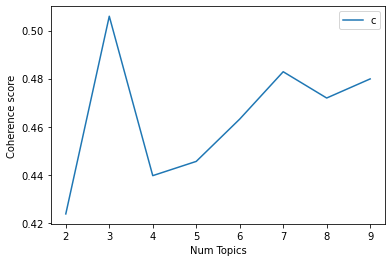

In [16]:
x = range(2, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [17]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.4238
Num Topics = 3  is having Coherence Value of 0.5059
Num Topics = 4  is having Coherence Value of 0.4397
Num Topics = 5  is having Coherence Value of 0.4456
Num Topics = 6  is having Coherence Value of 0.4632
Num Topics = 7  is having Coherence Value of 0.4829
Num Topics = 8  is having Coherence Value of 0.472
Num Topics = 9  is having Coherence Value of 0.4799


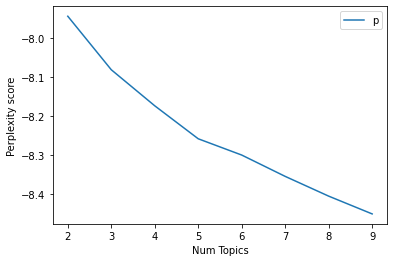

In [18]:
x = range(2, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [39]:
for m, cv in zip(x, perplexity_values):
    print("Num Topics =", m, " is having Perplexity Value of", round(cv, 4))

Num Topics = 2  is having Perplexity Value of -7.5559
Num Topics = 3  is having Perplexity Value of -7.6926
Num Topics = 4  is having Perplexity Value of -7.7823
Num Topics = 5  is having Perplexity Value of -7.8488
Num Topics = 6  is having Perplexity Value of -7.9095
Num Topics = 7  is having Perplexity Value of -7.947
Num Topics = 8  is having Perplexity Value of -7.9853
Num Topics = 9  is having Perplexity Value of -8.0317


De la literatura se sabe que valores pequeños de perplexity indican que el modelo está construido de forma adecuada, caso contrario a la coherencia, donde valores altos indican mejor ajuste a los datos. Dado esto y el conocimiento de la longitud de los documentos por persona es que se escoge el número de 'clusters' a contruir.  

Una vez definido el número de clusters, se ejecuta el algorítmo y se imprimen las palabras claves de cada grupo, permitiendo así la identificación de los tópicos presentes en los documentos 

In [25]:
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.007*"rico" + 0.007*"malo" + 0.006*"gustar" + 0.005*"arroz" + '
  '0.005*"querer" + 0.005*"decir" + 0.005*"hacer" + 0.004*"chocolate" + '
  '0.004*"bueno" + 0.004*"crema"'),
 (1,
  '0.007*"comer" + 0.006*"querer" + 0.006*"yogur" + 0.006*"malo" + '
  '0.004*"tomar" + 0.004*"poner" + 0.004*"mejor" + 0.004*"decir" + '
  '0.003*"arroz" + 0.003*"casar"')]


### Tópico dominante por respuesta

In [26]:
import dask.bag as bd 

row_bd = bd.from_sequence(enumerate(optimal_model[corpus_tfidf]), npartitions = 100)

In [27]:
def topics(df):
    
    sent_topics_df = []
    
    for i, row in df:
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = optimal_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df.append(dict(Dominant_Topic = int(topic_num), 
                                                            Perc_Contribution = round(prop_topic,4),
                                                            Topic_Keywords = topic_keywords))
            else:
                break
    
    return sent_topics_df


In [28]:
%%time
sent_topics_df = row_bd.map_partitions(topics)

Wall time: 171 ms


In [29]:
%%time
sent_topics_df = sent_topics_df.to_dataframe()
sent_topics_df.head()

Wall time: 5.53 s


,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,0,0.7822,"rico, malo, gustar, arroz, querer, decir, hace..."
1,1,0.9694,"comer, querer, yogur, malo, tomar, poner, mejo..."
2,0,0.7887,"rico, malo, gustar, arroz, querer, decir, hace..."
3,1,0.8984,"comer, querer, yogur, malo, tomar, poner, mejo..."
4,1,0.7361,"comer, querer, yogur, malo, tomar, poner, mejo..."


In [30]:
topics_df = sent_topics_df.compute()
topics_df['ID'] = list(data_lemmatized.index.values)
topics_df['Dominant_Topic'] = topics_df['Dominant_Topic'] + 1 

topics_df.to_excel('Tópicos_Respuesta.xlsx',index = False)

### Distribución de los tópicos

In [31]:
%%time

df_Topics = sent_topics_df.groupby('Dominant_Topic')['Perc_Contribution'].count().compute()
x = df_Topics.index + 1 
x = [str(int(inte)) for inte in x]
y = df_Topics.values
y = y/sum(y)

Wall time: 1.84 s


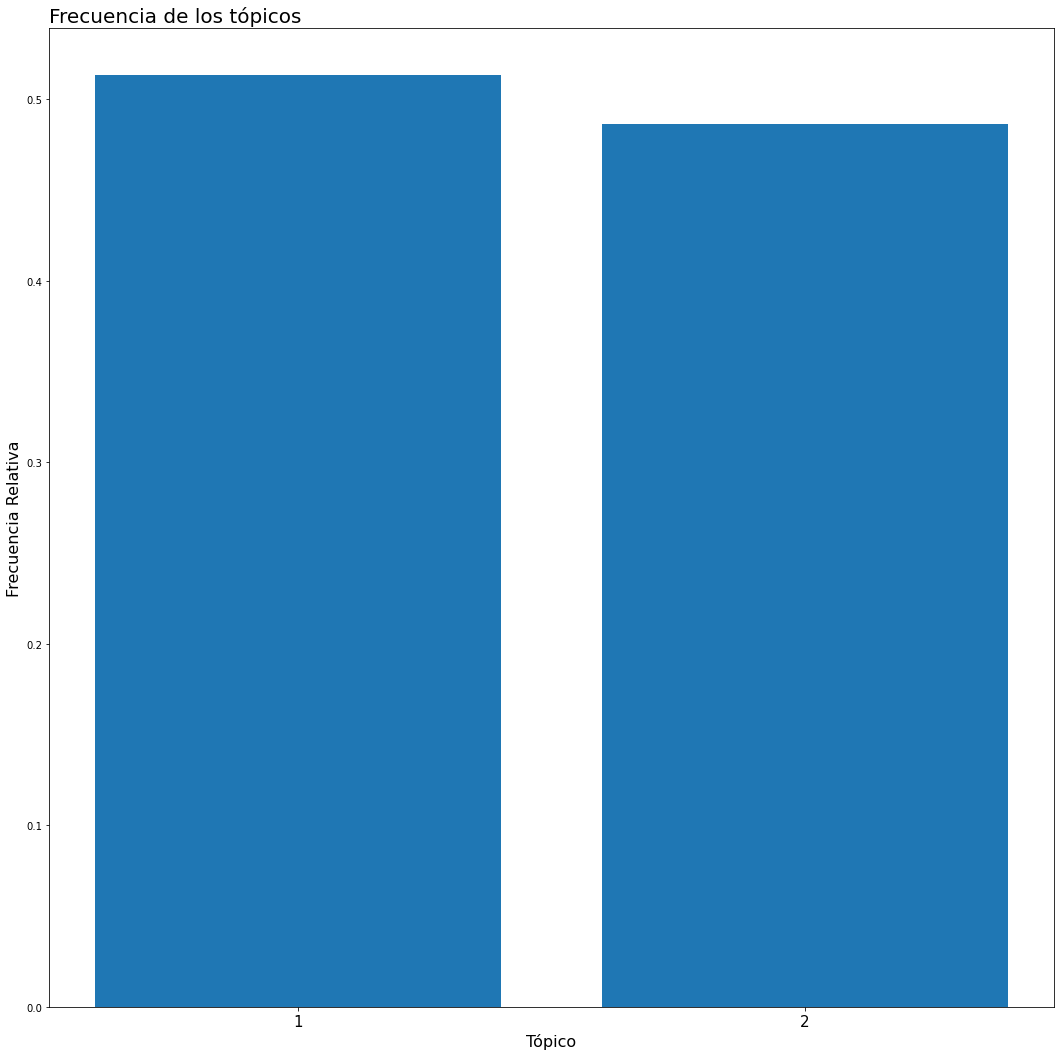

In [32]:
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=10)

fig, ax = plt.subplots()
fig.set_size_inches(18, 18)
ax.bar(x,y)

ax.set_title('Frecuencia de los tópicos', fontsize=20, loc = 'left')
ax.set_xlabel('Tópico', fontsize=16)
ax.set_ylabel('Frecuencia Relativa', fontsize=16)

plt.show()

### Visualizaión de los resultados

Una manera visual de verificar la calidad del modelo ajustado es con base en la siguiente gráfica, donde se presentan los tópicos a mano izquierda como circunferencias, se dice que el **LDA** funciona correctamente si no existen circulos que se traslapen absolutamente. 

In [33]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus_tfidf, id2word)
vis

PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
0      0.11261  0.0       1        1  50.244117
1     -0.11261  0.0       2        1  49.755883, topic_info=       Term        Freq       Total Category  logprob  loglift
427   tomar   84.000000   84.000000  Default  30.0000  30.0000
218  gustar  122.000000  122.000000  Default  29.0000  29.0000
844   yogur  137.000000  137.000000  Default  28.0000  28.0000
188   polvo   54.000000   54.000000  Default  27.0000  27.0000
124  llorar   53.000000   53.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
240   creer   51.149633   83.261301   Topic2  -5.8508   0.2108
56    arroz   62.010680  155.080317   Topic2  -5.6582  -0.2186
86    bueno   52.259327  130.414341   Topic2  -5.8293  -0.2165
210    rico   46.922985  177.772119   Topic2  -5.9370  -0.6340
184  probar   43.751171   61.741519   Topic2  -6.0070   0.3536

[174 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
84        1  0.034308         abrir
84        2  0.960635         abrir
366       1  0.936616        abuelo
197       1  0.969577  achocolatado
197       2  0.048479  achocolatado
...     ...       ...           ...
28        2  0.921285        volver
844       1  0.166874         yogur
844       2  0.834372         yogur
1550      1  0.045761          yuca
1550      2  0.960986          yuca

[254 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [34]:
os.chdir('../SALIDAS')
pyLDAvis.save_html(vis, 'LDA.html')

<h1 style ='color:#00CED1;' align = 'center'> Embedding - Glove </h1>
<h2 style = 'color:gray;' align ='center'> Análisis por Unigrama </h2>

El **LDA** no es la única manera de estudiar la presencia de tópicos/temas en los documentos de interés. Los métodos de incrustación permiten la transformación de los unigramas (palabras) a un vector dispuesto en un espacio d-dimensional, estos métodos de incrustación son autocodificadores cuyas arquitecturas ya han sido entrenadas sobre conjuntos de datos masivos y están dispuestos para varios idiomas. En este documento se emplea la maquina pre entrenada de Google **Glove** ya que el idioma de los textos a estudiar es español. Glove también está dispuesto para varios otros idiomas y claramente no es el único método de incrustación pre entrenado que existe en el mercado, otro ejemplo es **FastText** desarrollado por Facebook, sin embargo, no dispone herramientas para el español. Para fines ilustrativos un ejemplo de lo que sería una incrustación con **FastText** se deja a continuación: 

```python
from gensim.models.fasttext import FastText

embedding_size = 50
window_size = 10
min_word = 5
down_sampling = 1e-2

ft_model = FastText(data_lemmatized,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1, # Define el tipo de modelo a creac. 1 Define un modelo Skip.gram. 0 Bag of Words
                      iter=100)

word_vectors = ft_model.wv[ft_model.wv.vocab] # Vectores de palabras 

```

Los vectores de palabras obtenidos en la incrustación son el insumo fundamental para lo que viene. Ya que, una vez los datos están en este formato, métodos de clasificación no supervisada tradicionales pueden ser empleados.

In [35]:
%%time
unique_words = list(set([word for sublist in [' '.join(doc).split() for doc in data_lemmatized] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
df = pd.DataFrame(word_glove_vectors, index=unique_words)
df

Wall time: 1min 1s


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
penetrarte,0.009982,-0.81386,1.212600,0.877750,-0.091396,-0.52374,-2.36700,2.136500,-0.66283,-0.76307,...,0.681700,1.20050,-0.10117,-0.89826,-0.954720,-1.28590,-2.05860,-0.74476,-0.973900,-1.03410
soldar,1.079900,0.25217,-0.315780,3.543600,1.591800,-0.62484,1.75520,-0.391160,0.92806,-0.51137,...,0.591430,0.22776,2.17930,0.99921,0.506340,-0.40602,0.35457,0.39583,-1.831100,0.20754
excesivo,0.109720,3.17670,-0.673090,-0.263460,-0.075409,0.27371,-0.55182,0.112880,-3.27050,2.46640,...,1.566100,0.59534,0.66832,-0.45281,-1.154400,-3.52500,1.27190,0.76726,-0.573320,-1.32590
restringir,-1.576000,1.37080,1.071600,-1.352000,-0.858310,-0.33369,-0.84506,0.350600,-1.36300,0.68128,...,0.554450,2.11570,0.76983,-0.11986,-1.135200,-0.36744,0.22097,-0.44528,-0.495520,0.49106
convirtio,0.736870,-0.43712,0.638790,-0.035689,0.826890,0.87961,-0.34961,-0.112090,0.42076,-0.41274,...,-1.798400,0.67887,-0.49521,-0.42254,2.662300,0.84740,1.36790,0.77998,-1.781200,1.16550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bocachico,1.029400,-0.28930,-0.452820,-0.177870,0.075953,-0.34339,0.60141,-0.027416,1.17040,1.05960,...,1.176800,-0.69894,1.46450,-0.10170,1.228900,-0.95915,0.46460,-0.03775,-0.029781,-0.22444
alma,-1.474800,-0.28282,-2.604800,2.782400,6.306200,-1.69190,-1.39010,6.517600,3.10460,1.63340,...,2.221300,0.91160,2.78560,-1.67700,-0.171020,-0.99805,-2.80560,1.45860,-3.003200,-2.27290
baguette,-0.111950,-0.36836,-0.267800,0.387740,-0.644200,-0.47108,0.79182,-0.109890,0.77588,0.23655,...,0.058876,0.99616,1.41920,-0.43909,-0.505020,1.11420,0.27823,0.17455,0.145540,-0.27202
sombrilla,0.670470,-0.10915,-0.099517,0.742920,-0.702950,0.79590,-0.96223,1.580100,3.56070,2.70080,...,1.020100,0.92553,0.57962,0.96129,-1.388700,-1.63030,-0.62468,1.15490,-0.504530,0.75156


In [36]:
filtro = df.apply(np.sum, axis=1) == 0
df[filtro]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
dehuevo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iaxvb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pvgahvaqgt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arrrto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
limosnear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pizzita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ahogandose,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
desganar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gomelos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
print(sum(filtro))
df = df[-filtro]
df

521


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
penetrarte,0.009982,-0.81386,1.212600,0.877750,-0.091396,-0.52374,-2.36700,2.136500,-0.66283,-0.76307,...,0.681700,1.20050,-0.10117,-0.89826,-0.954720,-1.28590,-2.05860,-0.74476,-0.973900,-1.03410
soldar,1.079900,0.25217,-0.315780,3.543600,1.591800,-0.62484,1.75520,-0.391160,0.92806,-0.51137,...,0.591430,0.22776,2.17930,0.99921,0.506340,-0.40602,0.35457,0.39583,-1.831100,0.20754
excesivo,0.109720,3.17670,-0.673090,-0.263460,-0.075409,0.27371,-0.55182,0.112880,-3.27050,2.46640,...,1.566100,0.59534,0.66832,-0.45281,-1.154400,-3.52500,1.27190,0.76726,-0.573320,-1.32590
restringir,-1.576000,1.37080,1.071600,-1.352000,-0.858310,-0.33369,-0.84506,0.350600,-1.36300,0.68128,...,0.554450,2.11570,0.76983,-0.11986,-1.135200,-0.36744,0.22097,-0.44528,-0.495520,0.49106
convirtio,0.736870,-0.43712,0.638790,-0.035689,0.826890,0.87961,-0.34961,-0.112090,0.42076,-0.41274,...,-1.798400,0.67887,-0.49521,-0.42254,2.662300,0.84740,1.36790,0.77998,-1.781200,1.16550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bocachico,1.029400,-0.28930,-0.452820,-0.177870,0.075953,-0.34339,0.60141,-0.027416,1.17040,1.05960,...,1.176800,-0.69894,1.46450,-0.10170,1.228900,-0.95915,0.46460,-0.03775,-0.029781,-0.22444
alma,-1.474800,-0.28282,-2.604800,2.782400,6.306200,-1.69190,-1.39010,6.517600,3.10460,1.63340,...,2.221300,0.91160,2.78560,-1.67700,-0.171020,-0.99805,-2.80560,1.45860,-3.003200,-2.27290
baguette,-0.111950,-0.36836,-0.267800,0.387740,-0.644200,-0.47108,0.79182,-0.109890,0.77588,0.23655,...,0.058876,0.99616,1.41920,-0.43909,-0.505020,1.11420,0.27823,0.17455,0.145540,-0.27202
sombrilla,0.670470,-0.10915,-0.099517,0.742920,-0.702950,0.79590,-0.96223,1.580100,3.56070,2.70080,...,1.020100,0.92553,0.57962,0.96129,-1.388700,-1.63030,-0.62468,1.15490,-0.504530,0.75156


<h2 style ='color:#00CED1;' align = 'center'> Grafo </h2>

Una manera interesante de estudiar los tópicos es a traves de la construcción de un grafo, la cual solo requiere definir una relación entre cada palabra los cuales corresponderán a los nodos, esta relación se estableció con base a una similitud coseno; se dice que existe un enlace entre dos nodos (palabras) si su similitud es mayor a 0.5 (este criterio se puede variar con fines gráficos) 

#### Matriz de Similitudes

In [55]:
from scipy import spatial

vocabulario = list(df.index)

from_ = []
to_ = []

for i in range(len(vocabulario)-1):
    from_i = list(np.repeat([vocabulario[i]],len(vocabulario[i+1:]), axis=0))
    from_.extend(from_i)
    to_.extend(vocabulario[i+1:])

In [56]:
print('Número de enlaces:',len(from_))

Número de enlaces: 10902115


In [57]:
def similitude(tuple_,cutoff=0.5):
    
    dictionary = [ ]     
    for de, a in tuple_:
        simil = 1 - spatial.distance.cosine(np.array(df.loc[de,:]),np.array(df.loc[a,:]))
        if simil > cutoff:
            dictionary.append(dict(from_= de, to_ =a, sim = simil))

    return dictionary

In [59]:
%%time
tuple_bd = bd.from_sequence(list(zip(from_,to_)),npartitions=1000) 
dictionary = tuple_bd.map_partitions(similitude,cutoff=0.6)
dictionary

Wall time: 2min 4s


dask.bag<similitude, npartitions=1000>

In [60]:
dictionary.take(5)

({'from_': 'muerte', 'to_': 'asesinato', 'sim': 0.6887928247451782},
 {'from_': 'muerte', 'to_': 'muerta', 'sim': 0.6240020990371704},
 {'from_': 'muerte', 'to_': 'muerto', 'sim': 0.6499940752983093},
 {'from_': 'tortilla', 'to_': 'natilla', 'sim': 0.6898217797279358},
 {'from_': 'tortilla', 'to_': 'ensalada', 'sim': 0.725496232509613})

In [62]:
%%time
word_corr = dictionary.to_dataframe()
word_corr.head()

Wall time: 34.3 s


,from_,to_,sim
0,muerte,asesinato,0.688793
1,muerte,muerta,0.624002
2,muerte,muerto,0.649994
3,tortilla,natilla,0.689822
4,tortilla,ensalada,0.725496


In [134]:
%%time
grafo = word_corr.compute()
grafo = grafo.rename(columns={"from_": "from", "to_": "to"})

Wall time: 2h 17min 57s


In [136]:
len(grafo)

65564

In [137]:
nodos = list(grafo['from'])
nodos.extend(grafo['to'])
nodos = set(nodos)
words = [word for word in list(chain.from_iterable(data_lemmatized)) if word in nodos]
c = Counter(words)

diam = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns = {'index' : 'word', 0: 'size'}).sort_values('word')

In [138]:
print('Número de nodos:', len(nodos))

Número de nodos: 3878


Finalmente, una vez definida la matriz de enlaces se procede a la construcción del grafo. Los temas serán hallados utilizando métodos de partición de los grafos y el entregable a la marca corresponde a un archivo html totalmente dinámico, en el cuál se muestra el grafo y cada partición (tema) diferenciada por color.

In [191]:
%%time

import networkx as nx
from networkx.algorithms import community

#* Edges 
filtro = grafo.sim > 0.7 
#---- Sensitividad Threshoold - Mayores centralidades para representar - Calcular Theta (probabilidad mayor a XXX)

network = grafo.loc[filtro,:]
network = network.rename(columns = {'sim':'weight'})#/sum(network['sim'])
G = nx.from_pandas_edgelist(network, 'from','to',edge_attr  = 'weight')

#* Diametro del nodo 
for node, size in list(zip(diam['word'],diam['size'])):
    if (node in list(network['from'])) or (node in list(network['to'])):
        G.add_node(node, size = size)       

#* Diametros
diam_export = pd.DataFrame(index=G.nodes())
diam_export['size'] = pd.Series(nx.get_node_attributes(G, 'size'))    
    
#* Frecuencia nodos 
min_freq = 10
elim_nodes = []
for node, size in list(G.nodes(data=True)):
    if len(size) == 0:
        elim_nodes.append(node) 
    elif size['size'] < min_freq:   
        elim_nodes.append(node) 
        
G.remove_nodes_from(elim_nodes) 
        
#* Componentes
min_len = 5
componentes = nx.connected_components(G)
[elim_nodes.extend(comp) for comp in componentes if len(comp) < min_len] 
                
G.remove_nodes_from(elim_nodes)   

#* Change Width 
width = np.array([w for i,j, w in list(G.edges(data='weight'))])
width =  np.interp(width, (width.min(), width.max()), (+1, +5))

for e, w in list(zip(list(G.edges()),width)):
    G.add_edge(e[0],e[1],width = w)

#* Cluster 
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
i = 1 
for community in communities:
    for node in community:
        G.add_node(node, group = i)
    i = i + 1
    
#* Cambio de escala del tamaño de los nodos
sizes = np.array([ node_info['size'] for node, node_info in list(G.nodes(data=True))])
sizes = np.interp(sizes, (sizes.min(), sizes.max()), (+min_freq, +100))

for size, node in zip(sizes,list(G.nodes())):
    G.nodes(data=True)[node]['size'] = size
    
print('Número de nodos:', len(G.nodes()))
print('Número de enlaces:', len(G.edges()))    
print('Transitividad:',nx.transitivity(G))
print('Número Clusters:',i)

Número de nodos: 99
Número de enlaces: 142
Transitividad: 0.36830357142857145
Número Clusters: 12
Wall time: 7.73 s


In [192]:
from pyvis.network import Network

net = Network(height='800px',width = '800px')
net.show_buttons()

net.from_nx(G)
net.show('Grafo.html')

<h3 style='color:#00CED1;' align = 'center'> PCA </h3>

Para concluir, se muestra la ejecución de métodos de clusterización clásicos como el **K-means** el cual se apoya de métodos de reducción de dimensión como el **PCA** y **TNSE** para la presentación de resultados

In [98]:
%%time
from sklearn.decomposition import PCA

Z = np.array(df) 

pca = PCA(n_components=2) 
result = pca.fit_transform(Z) 

Wall time: 57.8 ms


**El ejemplo anterior ajusta en la memoria del dispositivo. Sin embargo, para un caso contrario se debe emplear el siguiente código**

```python
%%time
import dask.array as da
from dask_ml import decomposition

Z = da.from_array(Z)

pca = decomposition.PCA(n_components=2) 
result = pca.fit_transform(Z) 

```

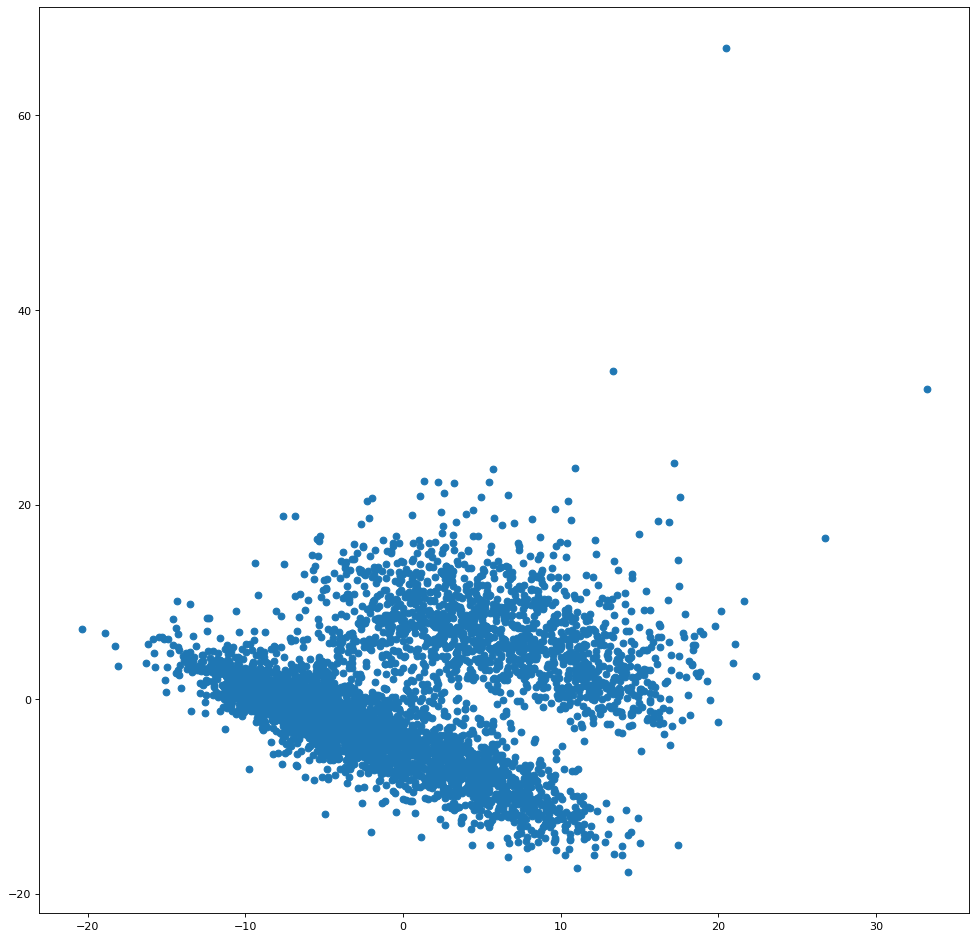

In [99]:
from matplotlib.pyplot import figure

matplotlib.rc('xtick', labelsize=10) 
figure(figsize=(15, 15), dpi=80)
plt.scatter(result[:,0],result[:,1])

#labels = list(df.index.values)
#for i, label in enumerate(labels):
#    plt.annotate(label, xy=(result[i, 0], result[i, 1]))

In [100]:
print(pca.explained_variance_ratio_)

[0.09564606 0.08054541]


<h3 style='color:#00CED1;' align='center' > TNSE </h3>

Wall time: 2min 2s


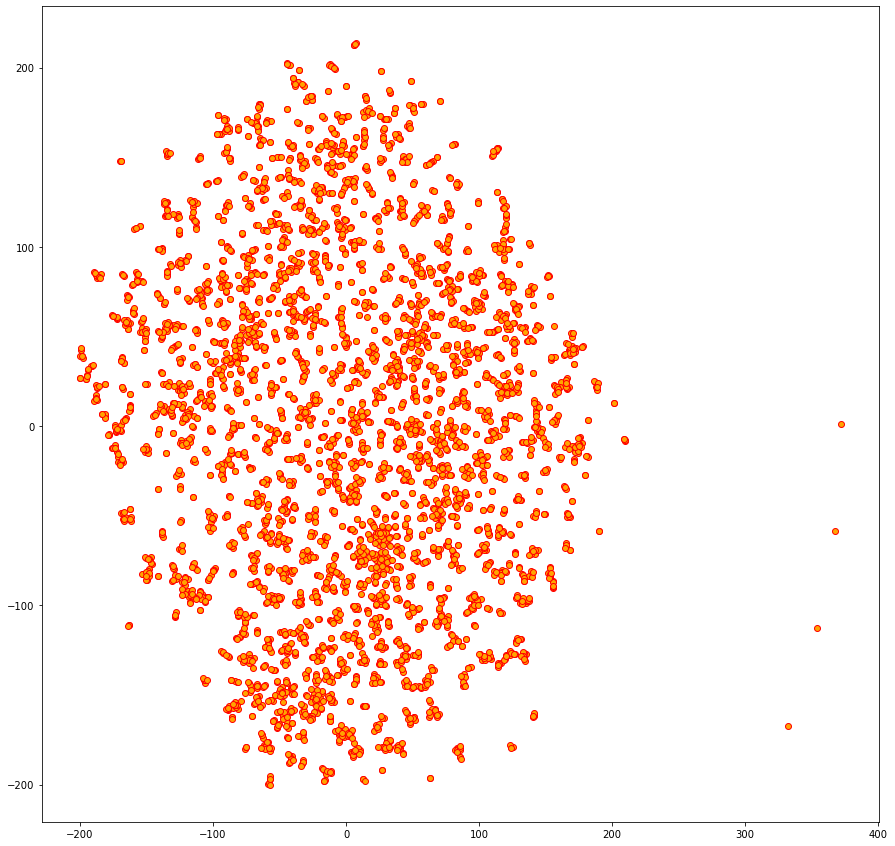

In [101]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(Z)

plt.figure(figsize=(15, 15))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')

#for label, x, y in zip(labels, T[:, 0], T[:, 1]):
#    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

<h3 style = 'color:#00CED1;' align = 'center' > K-Means </h3>

#### Número de clusters (Mirar esto con Dask)

In [102]:
%%time
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Z)
    Sum_of_squared_distances.append(km.inertia_)

Wall time: 1min 30s


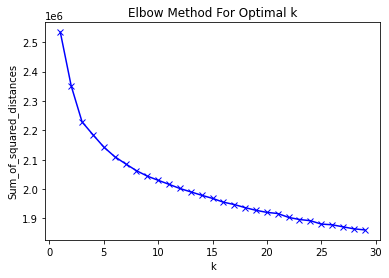

In [103]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [106]:
km = KMeans(n_clusters=4)
km.fit_transform(Z)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])

<h3 style = 'color:#00CED1;' align = 'center' > K-means en Dask  </h3>

In [46]:
%%time
from dask_ml import cluster
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(Z)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\David.solano\Anaconda3\envs\David\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Wall time: 1min 39s


**Nótese que para este caso, contrario al PCA, la función de KMeans implementada si genera una ganancia de tiempo, se espera que a mayor cantidad de datos más significativa sea la diferencia** 

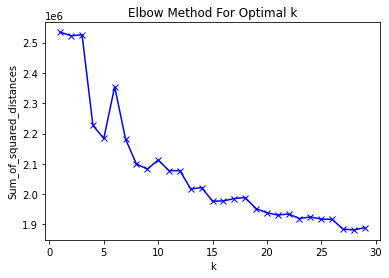

In [47]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [94]:
%%time
km = KMeans(n_clusters=3)
km.fit_transform(Z)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])

Wall time: 658 ms


#### PCA y K-Means

Mirar cuántas palabras graficar por grupo, el criterio va a ser la frecuencia de mención- un top XX de las más mencionadas por grupo

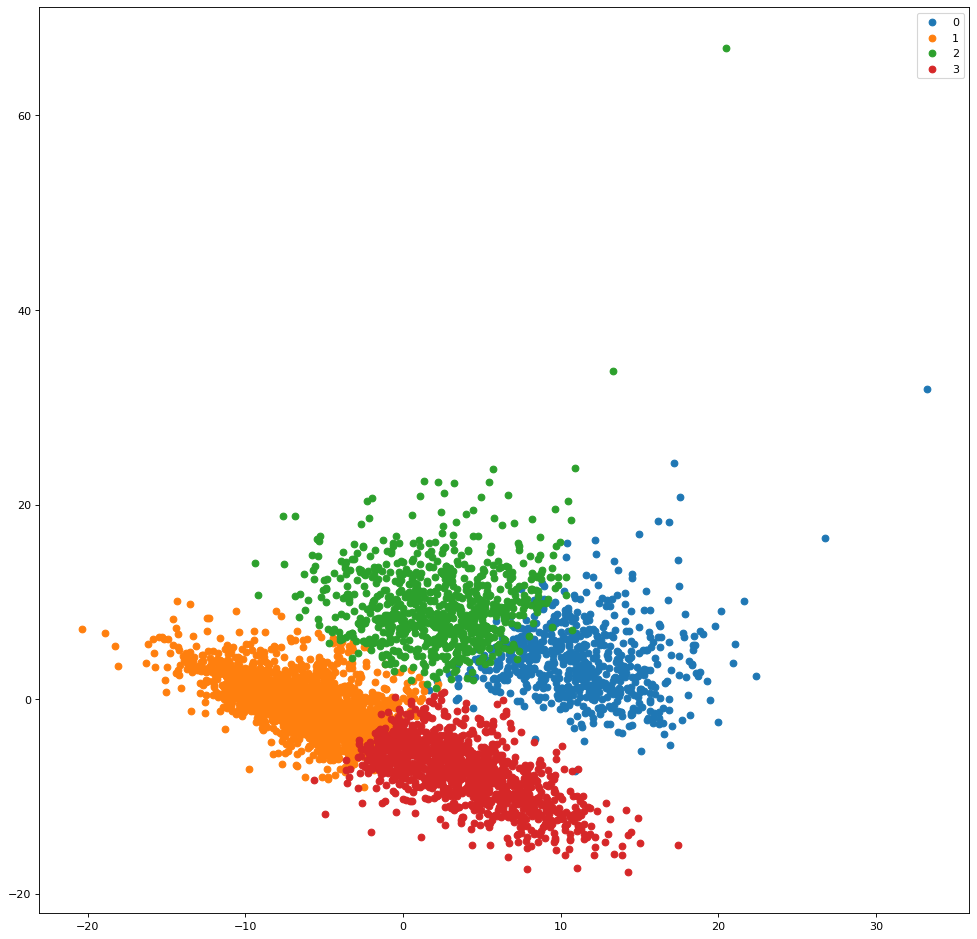

In [107]:
labels = cluster_labels.ClusterLabel
centroids = km.cluster_centers_
u_labels = np.unique(cluster_labels)
 
figure(figsize=(15, 15), dpi=80)
for i in u_labels:
    plt.scatter(result[labels == i , 0] , result[labels == i , 1] , label = i)
    
#for i, label in enumerate(labels):
#    plt.annotate(label, xy=(result[i, 0], result[i, 1]), xytext=(0, 0), textcoords='offset points')
    
plt.legend()
plt.show()

#### TNSE y K-means

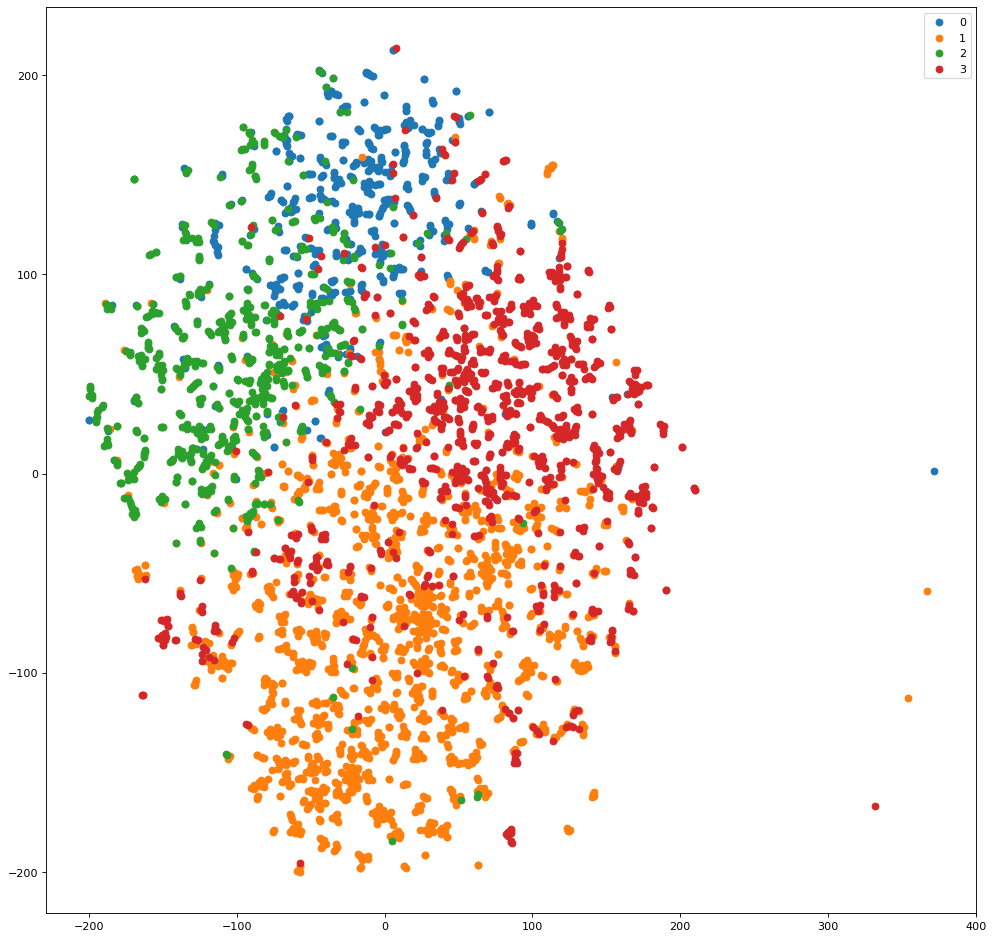

In [108]:
labels = cluster_labels.ClusterLabel
u_labels = np.unique(cluster_labels.ClusterLabel)
 
figure(figsize=(15, 15), dpi=80)
for i in u_labels:
    plt.scatter(T[labels == i , 0] , T[labels == i , 1] , label = i)
    
#for i, label in enumerate(labels):
#    plt.annotate(label, xy=(T[i, 0]+1, T[i, 1]+1), xytext=(0, 0), textcoords='offset points')
    
plt.legend()
plt.show()

In [109]:
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])

cluster_labels['palabra'] = list(df.index.values)
cluster_labels.head()

,ClusterLabel,palabra
0,2,penetrarte
1,2,soldar
2,3,excesivo
3,0,restringir
4,3,convirtio


In [110]:
cluster_labels.ClusterLabel.value_counts()

1    2030
3    1225
2     757
0     632
Name: ClusterLabel, dtype: int64

<h1 style = 'color:orange;' align = 'center' > Veámos algunos grupos </h1>

In [61]:
cluster_labels[cluster_labels.ClusterLabel==0].head(7)

,ClusterLabel,palabra
2,0,excesivo
4,0,convirtio
13,0,votante
15,0,herencia
18,0,exclusivo
30,0,segundo
33,0,racista


In [62]:
cluster_labels[cluster_labels.ClusterLabel==1].head(7)

,ClusterLabel,palabra
5,1,rampante
8,1,jajajajaja
10,1,placer
12,1,atroz
14,1,tipica
16,1,parejo
17,1,anoche


In [63]:
cluster_labels[cluster_labels.ClusterLabel==2].head(7)

,ClusterLabel,palabra
3,2,restringir
11,2,sentar
19,2,agrupar
26,2,enterar
45,2,confirmar
57,2,inscribirse
59,2,especificar


In [64]:
cluster_labels[cluster_labels.ClusterLabel==3].head(7)

,ClusterLabel,palabra
0,3,penetrarte
1,3,soldar
6,3,enrollar
7,3,matar
9,3,nadar
38,3,desgastar
46,3,pegarme


<h2 style = 'color:gray;' align ='center'> Análisis de n-gramas </h2>

Nótese que todos los métodos presentados para unigramas son extendibles de forma directa al estudio de n-gramas, la implementación sobre n-gramas se presenta acontinuación

In [65]:
%%time

def average_word_vectors(words, model,vocabulary):
    
    num_features = model.shape[1]
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, np.array(model.loc[word,]))
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    

def averaged_word_vectorizer(corpus, model):
    vocabulary = set(model.index.values)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary)
                    for tokenized_sentence in corpus]
    return np.array(features)

## get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=data_lemmatized, model=df)

Wall time: 4.84 s


In [66]:
pp = pd.DataFrame(w2v_feature_array)
pp.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.490700,-0.609650,-0.355760,-0.315240,-1.577500,-0.733150,-1.224100,1.196100,2.850700,0.998510,...,-2.218500,4.075100,2.726400,-4.212900,-0.382250,-2.974700,-0.397520,-2.030100,-3.137500,-0.317300
1,-0.821962,0.243958,0.363033,1.416971,0.432256,-0.622567,-0.605303,1.338796,0.055095,1.010327,...,1.100035,-0.748351,-0.201401,0.192267,0.646284,-0.864418,-1.083117,-0.181485,-0.273122,-0.066867
2,0.677925,0.496708,0.436863,0.592833,-0.854215,0.141793,0.056644,-0.289627,-0.995727,1.503912,...,0.554785,0.450527,1.652453,-0.392237,0.517157,-1.908073,-0.442367,-0.195102,-0.012490,-0.340985
3,1.151400,-0.158350,2.367800,-0.581040,0.791610,1.107200,1.796000,2.170400,-0.502450,2.997900,...,2.232500,3.737700,0.460380,-1.707700,-2.066800,-6.748500,0.851320,-2.730800,0.891040,-1.305800
4,0.410068,1.173133,0.310381,0.250474,-0.766645,-0.040130,-1.403206,0.192517,-0.156481,1.140347,...,0.463726,2.739131,1.158094,-2.629155,0.890279,-3.061285,-0.718308,-1.259706,-1.102001,-1.381069


In [67]:
len(pp)

4584

<h3 style = 'color:skyblue;' align ='center'> Propagación por afinidad: Afinity propagation </h3>

In [113]:
%%time
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(damping=0.9, max_iter=1000)
ap.fit(w2v_feature_array)

cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])

data_lemmatized_str = [' '.join(doc) for doc in data_lemmatized]

cluster_labels['documento'] = data_lemmatized_str
cluster_labels

Wall time: 8min 34s


,ClusterLabel,documento
0,133,sacar leche
1,154,leche macarrada romano druida magia demonio do...
2,39,subir pesar abri litro leche gaseoso butifarra
3,0,vaso
4,15,mojar leche minuto comer volver poner comer mi...
...,...,...
4851,160,creer malo leche terrorista
4852,336,traer
4853,220,traer queso paso
4854,65,queso


<h2 style = 'color:#00CED1;' align = 'center' > PCA </h2>

In [68]:
from sklearn.decomposition import PCA

Z =  w2v_feature_array 

pca = PCA(n_components=2) 
result = pca.fit_transform(Z) 

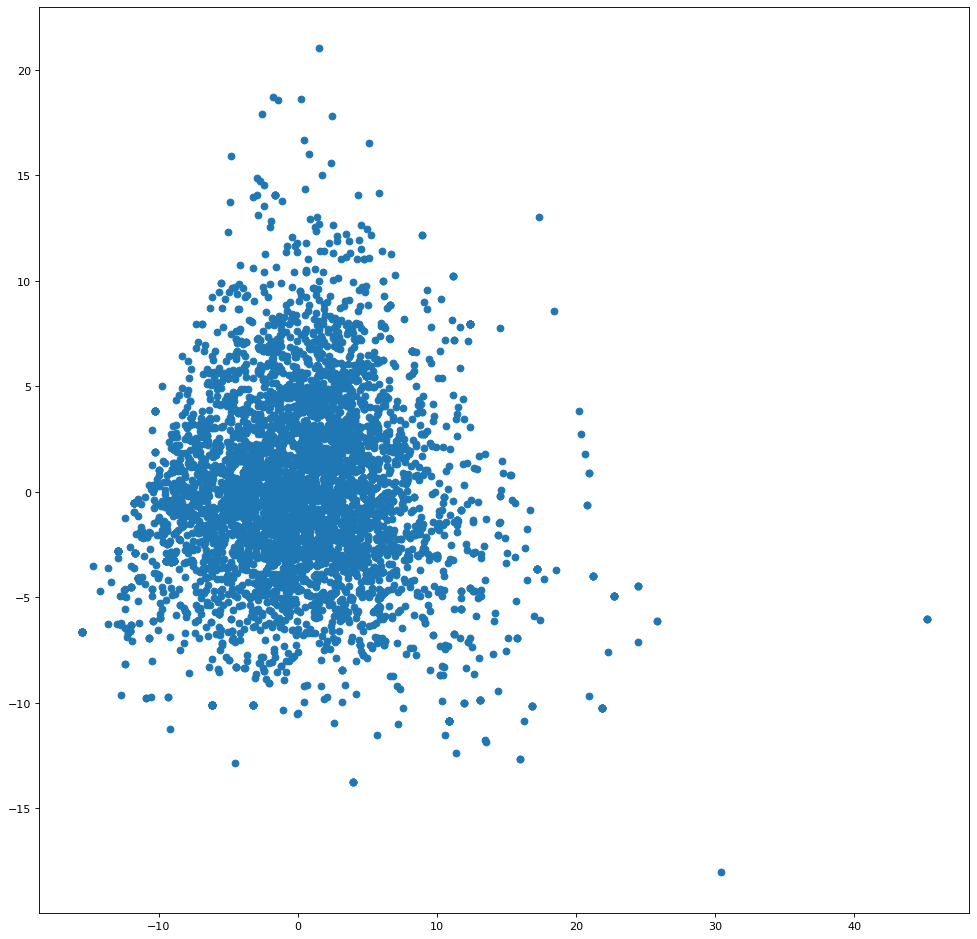

In [69]:
from matplotlib.pyplot import figure

matplotlib.rc('xtick', labelsize=10) 
figure(figsize=(15, 15), dpi=80)
plt.scatter(result[:,0],result[:,1])

#words = range(1,Z.shape[0]+1)
#for i, word in enumerate(words):
#    plt.annotate(word, xy=(result[i, 0]+1, result[i, 1]+1), xytext=(0, 0), textcoords='offset points')

In [70]:
pca.explained_variance_ratio_

array([0.13837798, 0.07627855])

<h2 style = 'color:#00CED1;' align = 'center' > TNSE </h2>

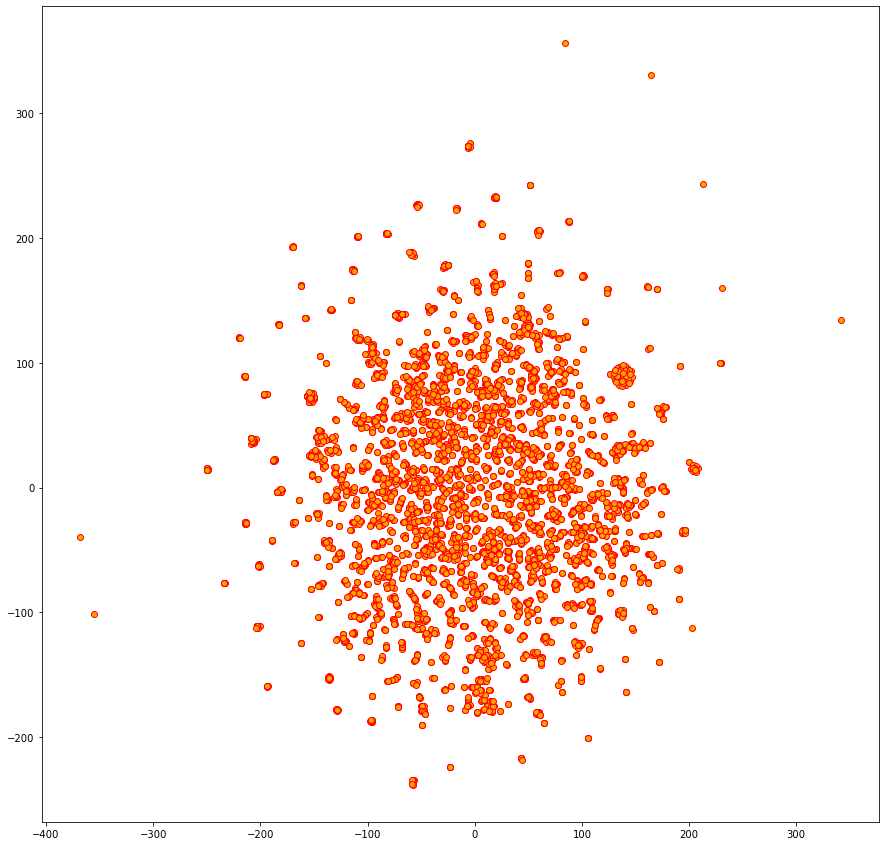

In [71]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(w2v_feature_array)
labels = range(1,Z.shape[0]+1)

plt.figure(figsize=(15, 15))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
#for label, x, y in zip(labels, T[:, 0], T[:, 1]):
#    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

<h3 style = 'color:#00CED1;' align = 'center' > K-Means </h3>

#### Número de clusters

In [72]:
%%time
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(w2v_feature_array)
    Sum_of_squared_distances.append(km.inertia_)

Wall time: 21.4 s


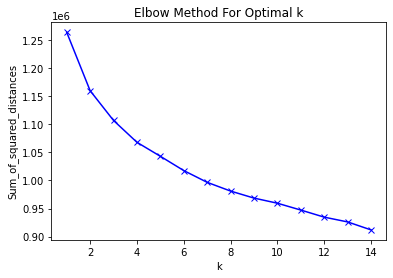

In [74]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [78]:
%%time
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(Z)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])

Wall time: 620 ms


In [79]:
cluster_labels.ClusterLabel.value_counts()

0    1884
2    1438
1    1262
Name: ClusterLabel, dtype: int64

#### PCA y K-Means (n.gramas)

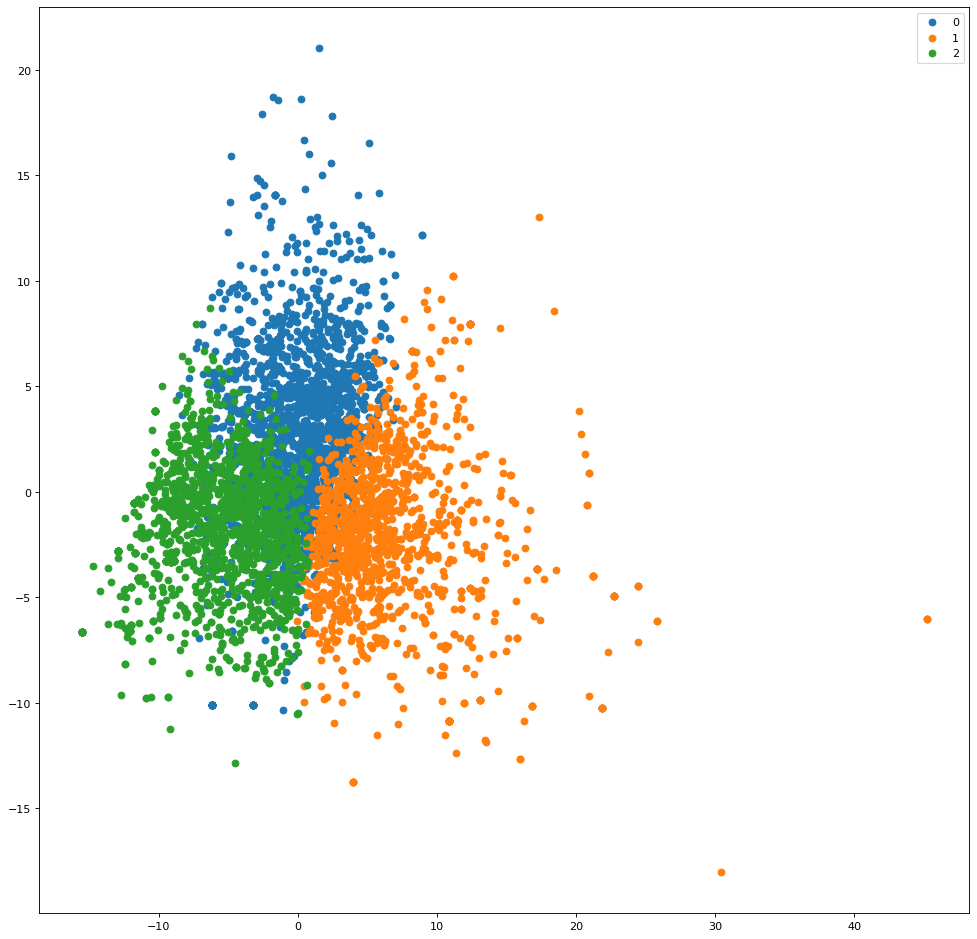

In [80]:
labels = cluster_labels.ClusterLabel
centroids = km.cluster_centers_
u_labels = np.unique(cluster_labels)
 
figure(figsize=(15, 15), dpi=80)
for i in u_labels:
    plt.scatter(result[labels == i , 0] , result[labels == i , 1] , label = i)
    
#for i, word in enumerate(words):
 #   plt.annotate(word, xy=(result[i, 0], result[i, 1]), xytext=(0, 0), textcoords='offset points')
    
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

#### TNSE y K-means (n.gramas)

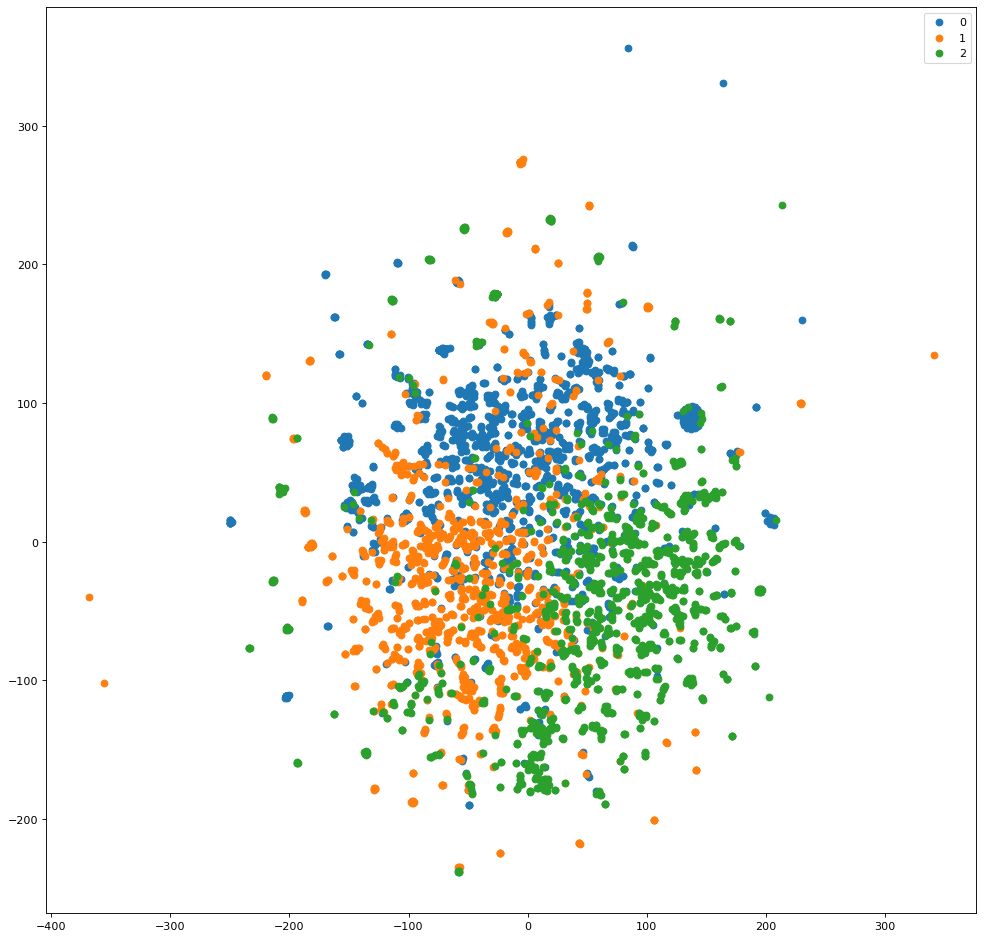

In [81]:
labels = cluster_labels.ClusterLabel
u_labels = np.unique(labels)
 
figure(figsize=(15, 15), dpi=80)
for i in u_labels:
    plt.scatter(T[labels == i , 0] , T[labels == i , 1] , label = i)
    
#for i, word in enumerate(words):
 #   plt.annotate(word, xy=(T[i, 0]+1, T[i, 1]+1), xytext=(0, 0), textcoords='offset points')
    
plt.legend()
plt.show()

In [84]:
data_lemmatized_str = [' '.join(doc) for doc in data_lemmatized]

cluster_labels['documento'] = data_lemmatized_str
cluster_labels

,ClusterLabel,documento
0,1,sacar
1,0,macarrada romano druida magia demonio doblaje ...
2,0,subir pesar abri litro gaseoso butifarra
3,2,vaso kcamexico
4,1,mojar minuto comer volver poner comer minuto v...
...,...,...
4579,0,creer malo terrorista
4580,1,traer pizza
4581,1,traer pizza paso
4582,2,cheddar


In [85]:
cluster_labels.ClusterLabel.value_counts()

0    1884
2    1438
1    1262
Name: ClusterLabel, dtype: int64

<h1 style = 'color:orange;' align='center' > Veámos algunos grupos </h1>

In [86]:
cluster_labels[cluster_labels.ClusterLabel==0].head(7)

,ClusterLabel,documento
1,0,macarrada romano druida magia demonio doblaje ...
2,0,subir pesar abri litro gaseoso butifarra
5,0,encantar dueno
6,0,momento pense debajo aguar echaria respirador ...
7,0,huevo pronto millón pastar marcar millón aceit...
13,0,mejor humedecer aguar
16,0,feriar gastronomica artesanal bolita iniciativ...


In [87]:
cluster_labels[cluster_labels.ClusterLabel==1].head(7)

,ClusterLabel,documento
0,1,sacar
4,1,mojar minuto comer volver poner comer minuto v...
12,1,apartar llevar arroz
14,1,ponersela obligar comer acompanar
15,1,echar termo
18,1,comprar
19,1,bueno tardar lloradera seriar soportar hinchar...


In [88]:
cluster_labels[cluster_labels.ClusterLabel==2].head(7)

,ClusterLabel,documento
3,2,vaso kcamexico
8,2,comerme chocolate vaso
9,2,almendra
10,2,querer boca lleno
11,2,almorzar
21,2,acabar pan salar
23,2,tostar hare


In [132]:
cluster_labels[cluster_labels.ClusterLabel==3].head(7)

,ClusterLabel,documento
21,3,acabar ponchera pan salar
38,3,zumo cafetero
44,3,necesitar querer teta sabroso delicioso jugoso...
45,3,listo alimentarme querer teta sabroso delicios...
55,3,desayuno nutritivo medio caja galleta vaso toddy
65,3,querer rico pezón areola humm querer teta sabr...
69,3,sabroso delicioso jugoso leche materno vainill...


In [ ]:
cluster_labels[cluster_labels.ClusterLabel==4].head(7)

In [89]:
len(cluster_labels)

4584

<h1 style ='color:blue;' align = 'center' > Conclusiones </h1>


Como es visto, existen diferentes alternativas que ayudan a construir clusters que revelan tópicos o temas de los cuales los consumidores están hablando, esto permitirá a la marca definir con mayor precisión la manera en qué debe comunicarse con los clientes o qué debe comunicarles para así mejorar la experiencia del cliente. En este punto es importante hablar de los efectos de las redes del marketing (cross side, same side, efecto de red negativo) los cuales tienen repercusión directa en los momentos de relación con el cliente (adquisición, retención, crecimiento y recomendación), ya que herramientas como las dispuestas en este notebook aumentan el chance de establecer una relación con el cliente casi que personalizada, lo cual, de acuerdo al modelo de negocio de la marca y sus objetivos impactará de forma contundente ya sea en la adquisición, retención, crecimiento de número de productos o recomendación de los clientes. 

<h1 style ='color:blue;' align = 'center' > Discusión </h1>


Ninguno de estos métodos es reemplazo de algún otro, todos son complementarios y deben ser estudiados sus resultados en detalle para encontrar aquel que se ajuste mejor a la realidad del fenómeno bajo estudio. Por un lado el estudio de n-gramas quizá facilite la perfilación de los consumidores de acuerdo a sus necesidades, por otro lado, el estudio de unigramas permitirá una visión más general de lo que el mercado como tal está hablando y requiriendo.